# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename,header = 0)




## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## My Response

I've chosen to use Book Review to predict/identify underlying topics/tags using popular machine learning methods like comparitive LDA topic modeling results with spaCy's named entity recognition (NER) results. Instagram and  WordPress, tags on student reviews describe what their content entails in hashtags (some which are manually added or based on the recommendation algorithm). This will be a unsupervised learning problem, however more on understanding the accuracy compared to the original review. This will include entity recognition, topic modeling, and possibile tags for reviews. 

 This is important for improving recommendation systems such as enchancing discovery, improving the search functionality when a user can easily locate the type of topics they want to see, if it was not manually added to a post, book, or any content. Also, it helps in organizing content when can improve customer engagement because of this flexibility.  

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## My Response

1. I check the data's dimensions and checked if there was any missing values.
2. I dropped "Positive Review" Column, because I didn't see it fit with my problem's goal
3. I started to Clean Data
  - My goal was to remove stop words, I did that by using a function designed to remove punctuation, apply lowercase, tokenize text, then apply the stop word function using the nltk package which I imported stopwords and word_tokenize function. I also added some stop words that were not considered such as "im" "would'nt". This helps the model avoid any caveats or distractions in the data that ruins the value of the key words we are trying to find

### Analysis
viewing the data there is a bit of feature imbalance within the amount of words for each review as well as the other characters present. while that does hinder the goal of finding the word, there isn't a way to scale the data because we will be using one feature only, namely `df['Review']`

In [3]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string;
import re


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
df.shape

(1973, 2)

In [5]:
df.columns, df.dtypes

(Index(['Review', 'Positive Review'], dtype='object'),
 Review             object
 Positive Review      bool
 dtype: object)

In [6]:
print(df.isnull().any().any(), df.isnull().sum())

False Review             0
Positive Review    0
dtype: int64


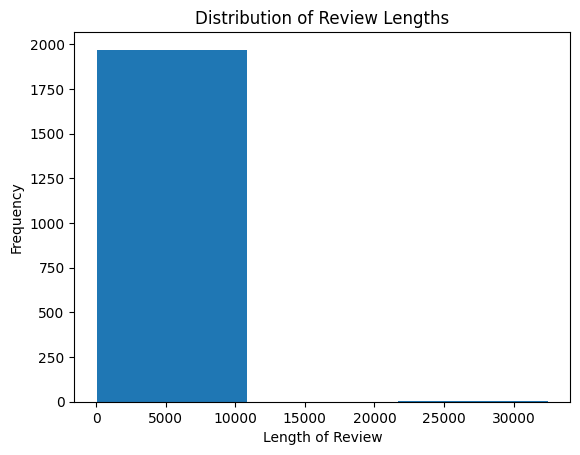

In [7]:
# Length of each review
df['review_length'] = df['Review'].apply(len)

# Plot
plt.hist(df['review_length'], bins=3)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


In [8]:
#Removed Positive Review
df = df.drop('Positive Review', axis = 1)

#### Clean Data 
Using a nltk package, there's an option to remove stopwords in English. This helps to remove words that carry little no value during text analysis and before performing any vectorization/word embedding.

1. convert to lowercase (optional)
2. tokenize text 
3. apply function to remove stop words `

4. Removing Punctuation


In [9]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text) 
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
#made a function to make it a little more readable before applying stop words
df['cleaned_review'] = df['Review'].apply(clean_text)
df['cleaned_review']

0       this was perhaps the best of johannes steinhof...
1       this very fascinating book is a story written ...
2       the four tales in this collection are beautifu...
3       the book contained more profanity than i expec...
4       we have now entered a second time of deep conc...
                              ...                        
1968    i purchased the book with the intention of tea...
1969    there are so many design books but the graphis...
1970    i am thilled to see this book being available ...
1971    as many have stated before me the book starts ...
1972    i love this book it is a terrific blend of han...
Name: cleaned_review, Length: 1973, dtype: object

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stopwords.words('english')) #reference to what words considered

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#make it to where it doesn't consider contractions. Since they might affect the 
#of each word 

additional_stop_words = set([
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm',
    'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
    'isn', 'aren', 'wasn', 'weren', 'hasn', 'haven', 'hadn', 'couldn', 'don', 'doesn', 'mustn',
    'shan', 'shouldn', 'wasn', 'weren', "wouldn't", "like", "im", "book"
])

stop_words.update(additional_stop_words)
print(stop_words)

{'im', 'now', "shan't", 'will', 'than', 'shouldn', 'him', 'yours', 'as', 'she', "hadn't", 'won', 'had', 'am', 'll', 'so', "doesn't", 'through', 'being', 're', "should've", 'until', 'then', 'wouldn', 'weren', 'these', "it's", 'over', "mightn't", 'ma', 'my', 'a', 'and', "that'll", 'at', 'when', 'they', 'herself', "she's", 'doing', 'between', 'during', 'haven', 'himself', 's', 'ain', 'theirs', 'in', 'with', 'them', 'can', 'our', 'do', 'but', 'further', 'its', 'each', 'down', 'below', 'ours', 'an', 'y', 'mustn', 'because', 'like', 'ourselves', 'there', 'did', 'for', "don't", 'those', "wasn't", 'if', 'are', "shouldn't", "you'll", 'into', 'be', "won't", 'while', 'myself', 'out', 'does', 'was', 'no', 'both', 'that', 'his', 'what', 'to', 'mightn', 'after', 'by', 'nor', 'where', 'were', 'd', 'themselves', 'been', "isn't", 'under', "couldn't", 'should', "hasn't", 'don', 'up', 'not', 'only', 'more', 'just', 'again', 'very', 'me', 'how', 'the', 'before', 'yourselves', 'shan', 'why', 'too', 'whom',

In [12]:
#Tokenizing words
df['cleaned_review'] = df['cleaned_review'].str.replace(f"[{string.punctuation}]", "", regex=True)
df['cleaned_review'] = df['cleaned_review'].apply(lambda review: ' '.join([word for word in word_tokenize(review) if word.lower() not in stop_words]))

In [13]:
df.head()

,Review,review_length,cleaned_review
0,This was perhaps the best of Johannes Steinhof...,503,perhaps best johannes steinhoffs books since d...
1,This very fascinating book is a story written ...,1436,fascinating story written form numerous letter...
2,The four tales in this collection are beautifu...,428,four tales collection beautifully composed art...
3,The book contained more profanity than I expec...,172,contained profanity expected read rita rudner ...
4,We have now entered a second time of deep conc...,2209,entered second time deep concern science math ...


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

###  MY Response 
My new feature list includes `df['Review']` and `df['cleaned_review']` I will be using cleaned review for the entirety, as the original column will be used as a reference to when I am analyzing the data. I chose to remove `Positive review` column because it did not seem appropriate for the problem I was addressing. First, to prepare this dataset, I will be using a LDA model which is a clustering teqnuique to group or capture topics within a dataset. My plan is to:

1. apply the feature label which is cleaned review and pass it through this NLP, splitting the set into training and testing data. We can first vectorize the dataset using sklearn and fit our training data set while transforming both X_train/y_train.
2. Use GridSearchCV to find optimal paramters for LDR such as batch_size, n_components, max_iterations, batch_size, etc.
3. Then pass the model through the dataset provided the best hyperparamters suited for this dataset

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#### Applying Feature Sets

In [15]:
X = df['cleaned_review']

In [16]:
X_train, X_test = train_test_split(X, test_size= 0.4, random_state=1234)

In [21]:
#Apply tfidf vectorizer to all data, fit only X_train
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [22]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

5000


In [23]:
#Apply LDA Model
lda_model = LatentDirichletAllocation()

#### Determine Paramters by using Param_grid 
Given the amount of hyperparamters LDA has, we can incorporate a grid to 
determine which are the best based on gridSearchCV. Here is my reference to what
paramters I am considering <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html" target="_blank">Here. </a>

In [24]:
param_grid = {
     'n_components': [5,10],  
    'learning_method': ['online','batch'], 
    'max_iter': [10,20], 
    'learning_decay': [0.3,0.5,0.7],  
    'learning_offset': [10.0,25.0], 
    'batch_size': [64,128] 
}

In [19]:
# Perform Grid Search
grid_search = GridSearchCV(
    estimator=lda_model,  
    param_grid=param_grid,
    cv=3, 
)
grid_search.fit(X_train_tfidf)

# Get the best parameters
best_params = grid_search.best_params_

print("Best hyperparameters:")
print(best_params)


Best hyperparameters:
{'batch_size': 64, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 25.0, 'max_iter': 20, 'n_components': 5}


In [25]:
lda_model = LatentDirichletAllocation(n_components=5,learning_method = 'online',max_iter = 20, learning_decay = 0.7, learning_offset = 20.0, batch_size = 64)
lda_model.fit(X_train_tfidf)


LatentDirichletAllocation(batch_size=64, learning_method='online',
                          learning_offset=20.0, max_iter=20, n_components=5)

In [57]:
X_train_topics = lda_model.transform(X_train_tfidf)
X_test_topics = lda_model.transform(X_test_tfidf)
X_train_topics.shape, X_test_topics.shape

((1183, 5), (790, 5))

In [58]:
def get_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_tags = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_tags)
    return topics

num_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = get_topics(lda_model, feature_names, num_words)

In [59]:
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    print(f"Topic #{topic_idx}: {' '.join(top_words)}")

Topic #0: knives faiths kahlan birds identification ole heritage monitor imperial determinism
Topic #1: joke knives faiths kahlan birds identification ole monitor imperial heritage
Topic #2: read books good story great really time know life reading
Topic #3: morrie curious horses mitch mouth straight lessons words knives different
Topic #4: rails monitor switches octal load clumps neal gravity knives winds


#### Analying Spacy to DataSet
Wanted to compare how a model like spAcy can perform to use entity recognition to capture important words

In [61]:
NER = spacy.load("en_core_web_sm")

In [63]:
def extract_entities(text):
    doc = NER(text)
    return [ent.text for ent in doc.ents]

df['entities'] = df['Review'].apply(extract_entities)

In [64]:
df.head()

,Review,cleaned_review,entities
0,This was perhaps the best of Johannes Steinhof...,perhaps best johannes steinhoffs books since d...,"[Johannes Steinhoff's, WW II, Germany, Steinho..."
1,This very fascinating book is a story written ...,fascinating story written form numerous letter...,"[Scottish, first, China, Japan, Japan, Japan, ..."
2,The four tales in this collection are beautifu...,four tales collection beautifully composed art...,[four]
3,The book contained more profanity than I expec...,contained profanity expected read rita rudner ...,[Rita Rudner]
4,We have now entered a second time of deep conc...,entered second time deep concern science math ...,"[second, first, Sputnik, Russians, the America..."


In [65]:
#Creating tags based on the current entites an
def generate_tags(row):
    tags = set(row['entities'])
    tags.update(row['cleaned_review'].split()[:2])
    for topic in topics:
        tags.update(set(topic))
    return list(tags)

df['tags'] = df.apply(generate_tags, axis=1)

In [66]:
df.head()

,Review,cleaned_review,entities,tags
0,This was perhaps the best of Johannes Steinhof...,perhaps best johannes steinhoffs books since d...,"[Johannes Steinhoff's, WW II, Germany, Steinho...","[life, horses, perhaps, ole, joke, kahlan, mor..."
1,This very fascinating book is a story written ...,fascinating story written form numerous letter...,"[Scottish, first, China, Japan, Japan, Japan, ...","[life, horses, ole, joke, kahlan, morrie, swit..."
2,The four tales in this collection are beautifu...,four tales collection beautifully composed art...,[four],"[life, horses, ole, joke, kahlan, morrie, swit..."
3,The book contained more profanity than I expec...,contained profanity expected read rita rudner ...,[Rita Rudner],"[Rita Rudner, life, horses, ole, joke, kahlan,..."
4,We have now entered a second time of deep conc...,entered second time deep concern science math ...,"[second, first, Sputnik, Russians, the America...","[daily, life, horses, ole, joke, kahlan, morri..."


In [30]:
df['cleaned_review'].dtype,df['tags'].dtype

(dtype('O'), dtype('O'))

#### Understanding Distribution

In [30]:
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]


# Convert top_words dictionary to DataFrame
top_words_df = pd.DataFrame.from_dict(top_words, orient='index')


top_words_df.columns = [f"Top {i+1}" for i in range(top_words_df.shape[1])]
top_words_df

,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,read,books,good,story,great,really,time,know,life,reading
1,knives,faiths,kahlan,birds,identification,ole,imperial,heritage,joke,fighting
2,sandra,knives,fighting,acquisitions,brown,disappointment,turner,keeps,guessing,suspense
3,rails,morrie,identification,joke,web,curious,horses,mitch,jokes,impressed
4,origami,beware,wise,david,contain,teach,diagrams,mention,models,recomend


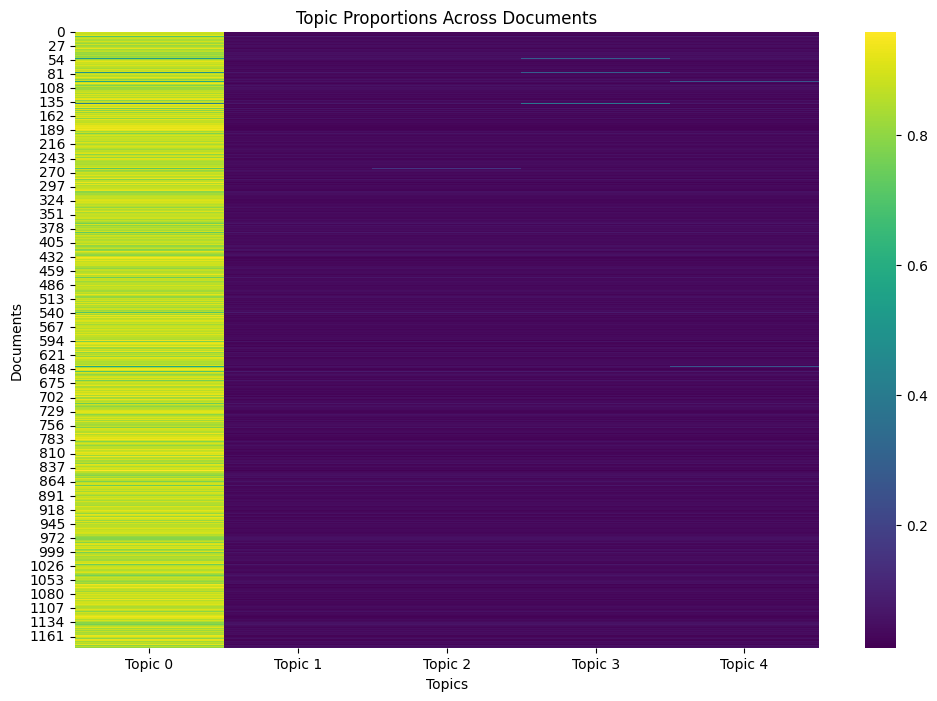

In [37]:
X_train_topics = lda_model.transform(X_train_tfidf)
topic_proportions_df = pd.DataFrame(X_train_topics, columns=[f"Topic {i}" for i in range(lda_model.n_components)])
plt.figure(figsize=(12, 8))
sns.heatmap(topic_proportions_df , cmap='viridis', cbar=True)
plt.title('Topic Proportions Across Documents')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.show()

Note: I wasn't able to completely finish my analysis due to my kernel dying and refreshing models that did take a while. 

### Analysis on LDA Model 
The hyperparameters I considered were batch_size, the type of learning method, the learning_offset which is 

When increasing n_components between 5-10, we see that our model does perform more poorly on topic 0, but there is a larger distribution from topic words 1 to 4. That is partly due to the distribution of words per document in each document when reading the data.